In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Processing the data

In [4]:
df=pd.read_csv('/content/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Checking for missing values

In [7]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


no missing values

# Checking for duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

No duplicates

# Dropping unnecessary columns

In [9]:
#StudentID is a unique column so we must drop it or our model performance will drop a lot
df.drop('StudentID',axis='columns',inplace=True)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


No categorical columns, all columns are numeric

# Checking target column

In [10]:
df['GPA'].value_counts()

,count
GPA,
0.000000,16
4.000000,7
0.654490,1
1.826265,1
2.167615,1
...,...
2.952146,1
0.963375,1
3.334972,1


In [11]:
df['GPA'].describe()

,GPA
count,2392.000000
mean,1.906186
std,0.915156
min,0.000000
25%,1.174803
50%,1.893393
75%,2.622216
max,4.000000


# Visualizations

Checking Target column distribution

Text(0.5, 1.0, 'GPA Distribution')

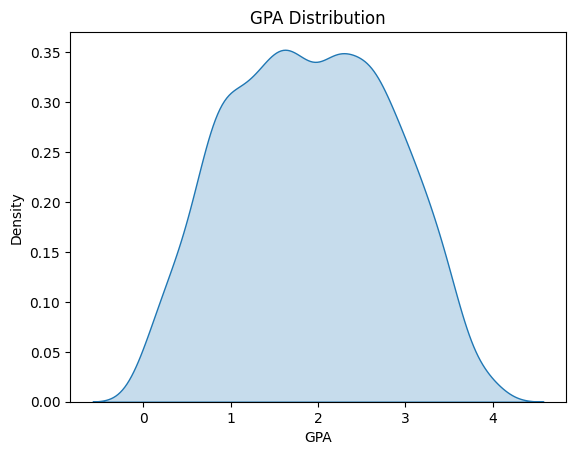

In [12]:
sns.kdeplot(data=df,x='GPA',fill=True)
plt.xlabel("GPA")
plt.ylabel("Density")
plt.title("GPA Distribution")

we can see that it is a normal distribution, no skew

Also, GPA is continuous so regression models will be used

Checking features with target

Text(0.5, 1.0, 'GradeClass Distribution')

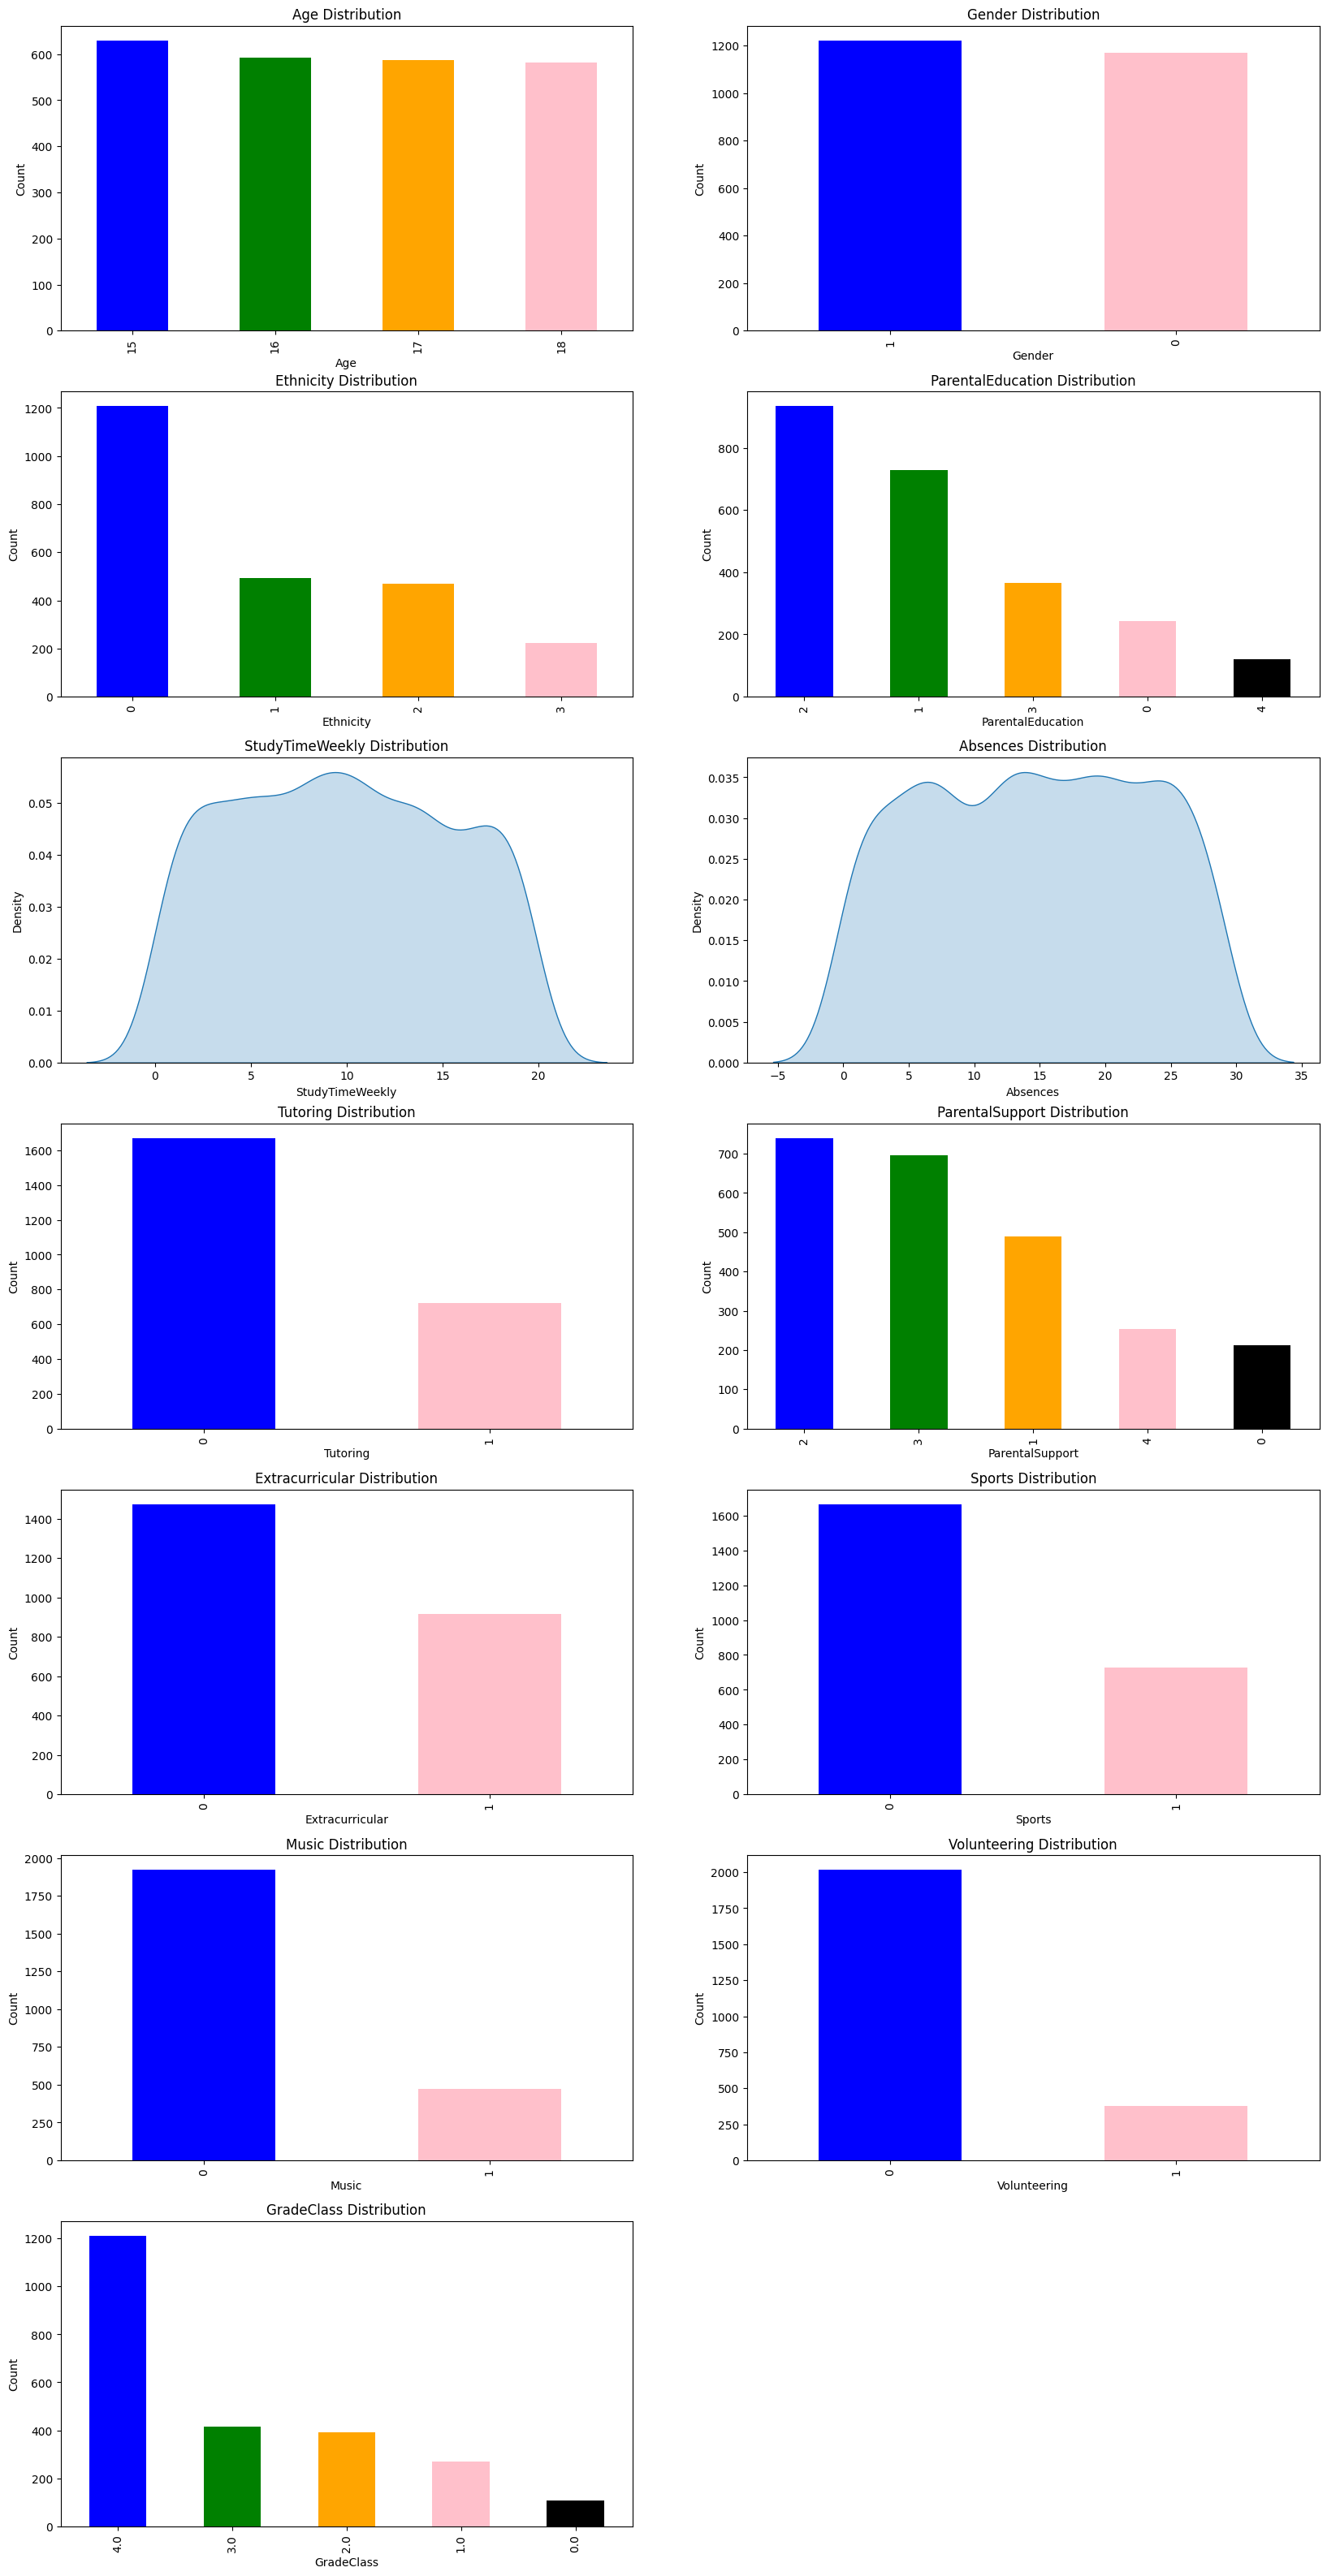

In [13]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
df['Age'].value_counts().plot(kind='bar',color=['blue','green','orange','pink'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.subplot(7,2,2)
df['Gender'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.subplot(7,2,3)
df['Ethnicity'].value_counts().plot(kind='bar',color=['blue','green','orange','pink'])
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Ethnicity Distribution")
plt.subplot(7,2,4)
df['ParentalEducation'].value_counts().plot(kind='bar',color=['blue','green','orange','pink','black'])
plt.xlabel("ParentalEducation")
plt.ylabel("Count")
plt.title("ParentalEducation Distribution")
plt.subplot(7,2,5)
sns.kdeplot(data=df,x='StudyTimeWeekly',fill=True)
plt.xlabel("StudyTimeWeekly")
plt.ylabel("Density")
plt.title("StudyTimeWeekly Distribution")
plt.subplot(7,2,6)
sns.kdeplot(data=df,x='Absences',fill=True)
plt.xlabel("Absences")
plt.ylabel("Density")
plt.title("Absences Distribution")
plt.subplot(7,2,7)
df['Tutoring'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("Tutoring")
plt.ylabel("Count")
plt.title("Tutoring Distribution")
plt.subplot(7,2,8)
df['ParentalSupport'].value_counts().plot(kind='bar',color=['blue','green','orange','pink','black'])
plt.xlabel("ParentalSupport")
plt.ylabel("Count")
plt.title("ParentalSupport Distribution")
plt.subplot(7,2,9)
df['Extracurricular'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("Extracurricular")
plt.ylabel("Count")
plt.title("Extracurricular Distribution")
plt.subplot(7,2,10)
df['Sports'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("Sports")
plt.ylabel("Count")
plt.title("Sports Distribution")
plt.subplot(7,2,11)
df['Music'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("Music")
plt.ylabel("Count")
plt.title("Music Distribution")
plt.subplot(7,2,12)
df['Volunteering'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("Volunteering")
plt.ylabel("Count")
plt.title("Volunteering Distribution")
plt.subplot(7,2,13)
df['GradeClass'].value_counts().plot(kind='bar',color=['blue','green','orange','pink','black'])
plt.xlabel("GradeClass")
plt.ylabel("Count")
plt.title("GradeClass Distribution")

# Checking for outliers

Text(0.5, 1.0, 'GPA Distribution')

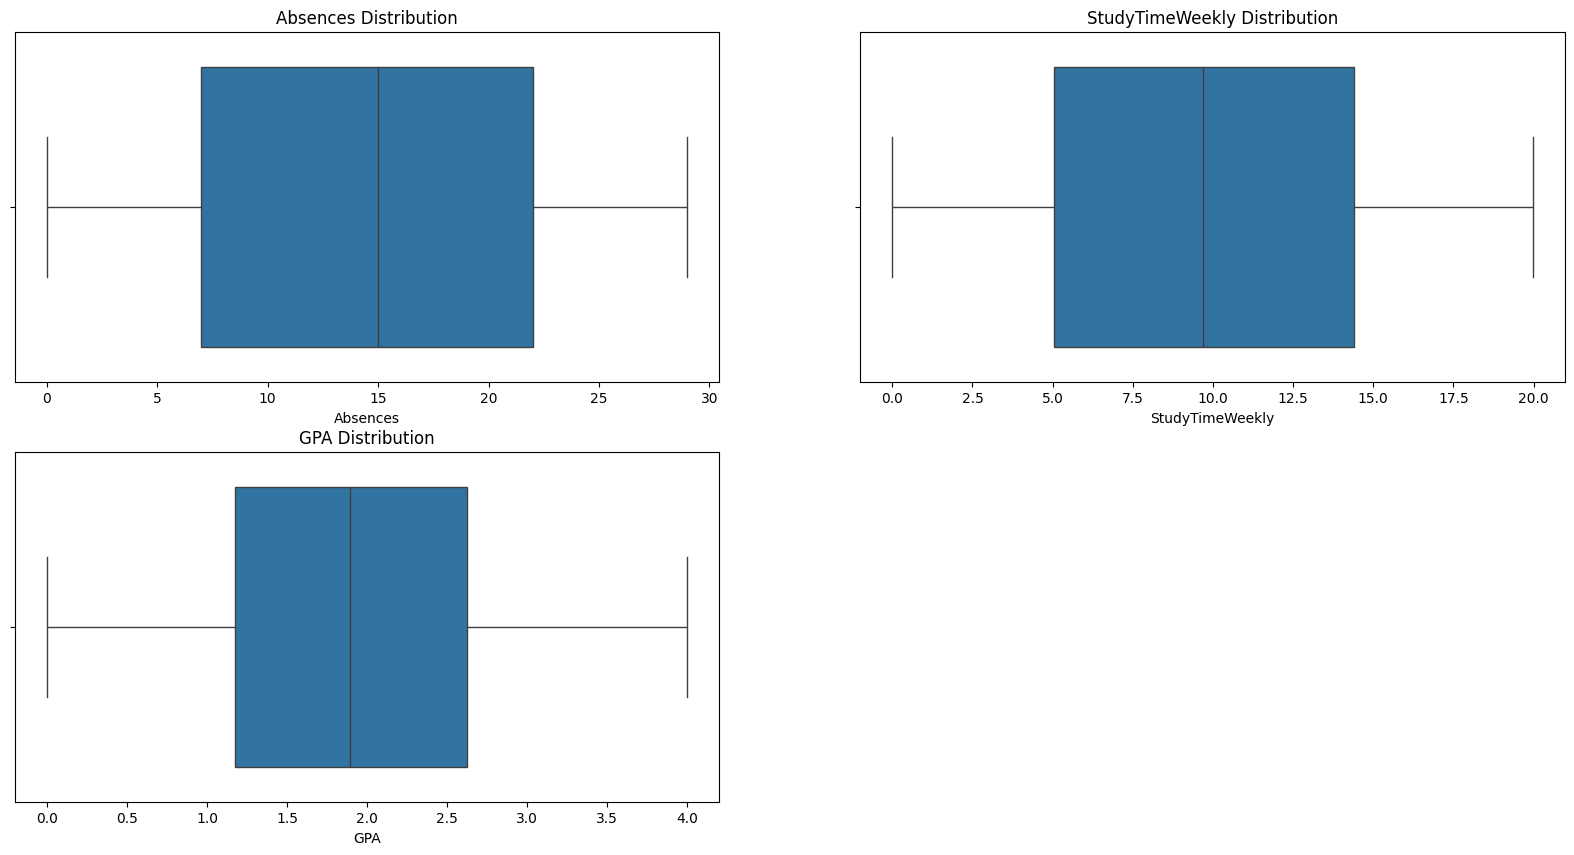

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='Absences')
plt.title("Absences Distribution")
plt.subplot(2,2,2)
sns.boxplot(data=df,x='StudyTimeWeekly')
plt.title("StudyTimeWeekly Distribution")
plt.subplot(2,2,3)
sns.boxplot(data=df,x='GPA')
plt.title("GPA Distribution")


No outliers

# Splitting to X and Y

In [15]:
X=df.drop("GPA",axis='columns')
X.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [16]:
Y=df.GPA
Y.head()

,GPA
0,2.929196
1,3.042915
2,0.112602
3,2.054218
4,1.288061


# Splitting to train and test splits

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print("Shape of X: ",np.shape(X))
print("Shape of X train: ",np.shape(X_train))
print("Shape of X test: ",np.shape(X_test))

Shape of X:  (2392, 13)
Shape of X train:  (1913, 13)
Shape of X test:  (479, 13)


# Feature scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
for col in X_train.columns:
    mms=MinMaxScaler()
    X_train[col]=mms.fit_transform(X_train[[col]])
    X_test[col]=mms.transform(X_test[[col]])
X_train.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
1021,0.000000,1.0,0.000000,0.00,0.289863,0.068966,0.0,0.25,1.0,0.0,0.0,0.0,0.5
1908,0.333333,1.0,0.000000,0.50,0.329679,0.931034,1.0,0.75,1.0,0.0,0.0,1.0,1.0
1355,1.000000,1.0,0.000000,0.75,0.018000,0.655172,1.0,0.25,0.0,0.0,0.0,0.0,1.0
574,0.666667,0.0,0.666667,0.75,0.158412,0.931034,1.0,0.75,1.0,0.0,0.0,0.0,1.0
1038,0.000000,0.0,0.333333,0.50,0.379845,0.172414,0.0,0.25,1.0,1.0,0.0,0.0,0.5


In [19]:
X_test.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
847,0.333333,0.0,0.333333,0.50,0.410924,0.724138,0.0,0.00,1.0,0.0,1.0,0.0,1.00
1728,0.333333,1.0,0.000000,0.75,0.607364,0.655172,0.0,0.75,0.0,0.0,0.0,1.0,1.00
2386,0.333333,0.0,0.000000,0.50,0.691442,0.482759,0.0,0.50,0.0,0.0,0.0,0.0,1.00
312,1.000000,1.0,0.666667,0.75,0.599913,0.827586,0.0,0.25,0.0,0.0,0.0,0.0,1.00
939,0.333333,1.0,0.666667,0.25,0.280733,0.413793,0.0,1.00,0.0,0.0,0.0,0.0,0.75


# Models

since it is regression so we can use Linear Regression or Polynomial Regression

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred_linear=model.predict(X_test)
mse_test=mean_squared_error(Y_test,model.predict(X_test))
mae_test=mean_absolute_error(Y_test,model.predict(X_test))
rmse_test=np.sqrt(mse_test)
r2_score_test=r2_score(Y_test,model.predict(X_test))
print("Linear Regression: ")
print("Test MSE: ",mse_test)
print("Test MAE: ",mae_test)
print("Test RMSE: ",rmse_test)
print("Test R2 score: ",r2_score_test)
print('-'*33)
mse_train=mean_squared_error(Y_train,model.predict(X_train))
mae_train=mean_absolute_error(Y_train,model.predict(X_train))
rmse_train=np.sqrt(mse_train)
r2_score_train=r2_score(Y_train,model.predict(X_train))
print("Train MSE: ",mse_train)
print("Train MAE: ",mae_train)
print("Train RMSE: ",rmse_train)
print("Train R2 score: ",r2_score_train)

Linear Regression: 
Test MSE:  0.0323868083029456
Test MAE:  0.14694997064690485
Test RMSE:  0.1799633526664404
Test R2 score:  0.9620281347880101
---------------------------------
Train MSE:  0.03688266599836093
Train MAE:  0.155767021984705
Train RMSE:  0.19204860321897926
Train R2 score:  0.9557275004087177


# Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
poly_features=PolynomialFeatures(degree=2)
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)
model=LinearRegression()
model.fit(X_train_poly,Y_train)
y_pred_poly=model.predict(X_test_poly)
mse_test=mean_squared_error(Y_test,model.predict(X_test_poly))
mae_test=mean_absolute_error(Y_test,model.predict(X_test_poly))
rmse_test=np.sqrt(mse_test)
r2_score_test=r2_score(Y_test,model.predict(X_test_poly))
print("Polynomial Regression with degree 2: ")
print("Test MSE: ",mse_test)
print("Test MAE: ",mae_test)
print("Test RMSE: ",rmse_test)
print("Test R2 score: ",r2_score_test)
print('-'*33)
mse_train=mean_squared_error(Y_train,model.predict(X_train_poly))
mae_train=mean_absolute_error(Y_train,model.predict(X_train_poly))
rmse_train=np.sqrt(mse_train)
r2_score_train=r2_score(Y_train,model.predict(X_train_poly))
print("Train MSE: ",mse_train)
print("Train MAE: ",mae_train)
print("Train RMSE: ",rmse_train)
print("Train R2 score: ",r2_score_train)

Polynomial Regression with degree 2: 
Test MSE:  0.030791624532164035
Test MAE:  0.1408032182870893
Test RMSE:  0.17547542429686283
Test R2 score:  0.9638984056268616
---------------------------------
Train MSE:  0.032284803857022724
Train MAE:  0.14251810935380926
Train RMSE:  0.17967972578179967
Train R2 score:  0.9612465930302275


# Comparing Prediction to actual values for linear and polynomial regression

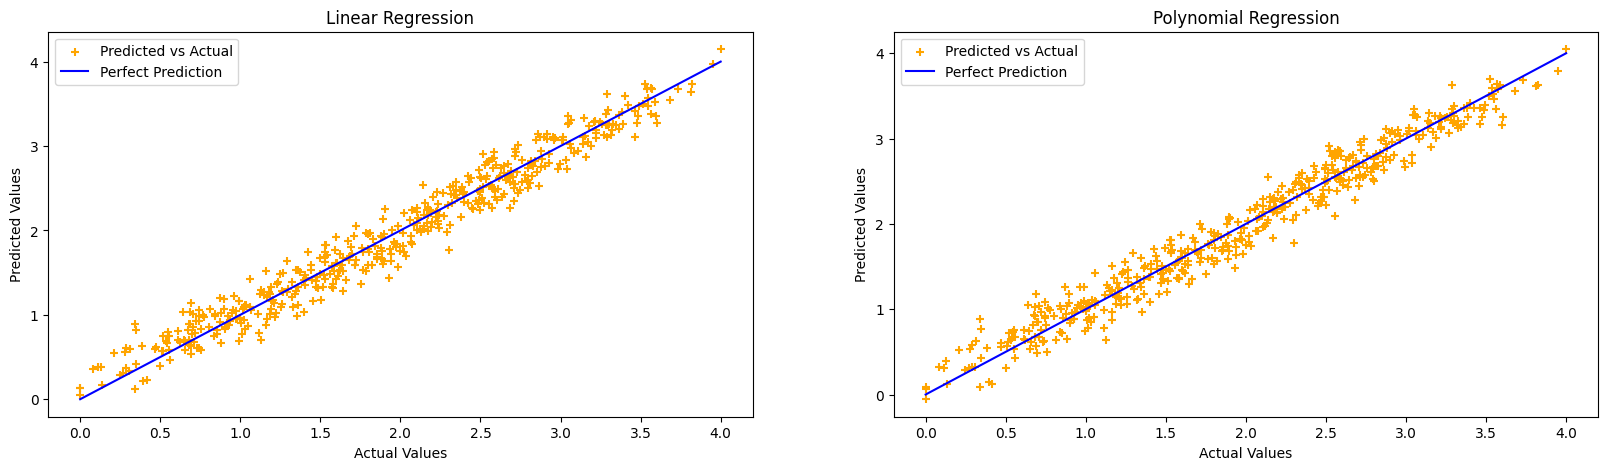

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(Y_test, y_pred_linear, color="orange", marker="+", label="Predicted vs Actual")
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color="blue", linestyle="-", label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(Y_test, y_pred_poly, color="orange", marker="+", label="Predicted vs Actual")
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color="blue", linestyle="-", label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression")
plt.legend()

From graph we can see that Polynomial Regression model with degree 2 is fitting the data better than the Linear Regression model.